In [1]:
import nbformat
from nbformat import v4

# Load the current notebook
notebook = nbformat.read(open('circle 27 .ipynb'), as_version=4)

# Iterate over each cell and add an id field to code cells if missing
for cell in notebook['cells']:
    if cell['cell_type'] == 'code':
        if 'id' not in cell:
            cell['id'] = v4.new_id()

# Save the modified notebook
nbformat.write(notebook, open('circle 27.ipynb', 'w'))


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df7 = pd.read_csv(r'C:\Users\lenovo\Downloads\crime_data_chicago.csv').drop('Unnamed: 0', axis=1)

In [4]:
df7

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,...,42.0,8.0,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,NaN,NaN,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)"
2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,4.0,38.0,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,42.0,8.0,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)"


In [5]:
df7.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [7]:
# change date from object to datetime
df7['Date'] = pd.to_datetime(df7['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Verify the data type change
print(df7.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


In [8]:
# Extract month and day from 'Date
df7['Month'] = df7['Date'].dt.month
df7['Day'] = df7['Date'].dt.day


In [9]:
df7.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day
0,6407111,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",7,26
1,11398199,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,...,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",7,31
2,5488785,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,...,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",4,27
3,11389116,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",7,23
4,12420431,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",7,11


In [10]:
# Check for missing values
print(df7.isnull().sum())


ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
Month                        0
Day                          0
dtype: int64


In [11]:
# Impute missing values in 'Location Description' with 'Unknown'
df7['Location Description'].fillna('Unknown', inplace=True)


In [12]:
# Impute missing values in 'District' with the mode
df7['District'].fillna(df7['District'].mode()[0], inplace=True)


In [13]:
# Impute missing values in 'X Coordinate' with median
df7['X Coordinate'].fillna(df7['X Coordinate'].median(), inplace=True)

# Impute missing values in 'Y Coordinate' with median
df7['Y Coordinate'].fillna(df7['Y Coordinate'].median(), inplace=True)

# Impute missing values in 'Latitude' with median
df7['Latitude'].fillna(df7['Latitude'].median(), inplace=True)

# Impute missing values in 'Longitude' with median
df7['Longitude'].fillna(df7['Longitude'].median(), inplace=True)


In [14]:
# Impute missing values in 'Ward' with median
df7['Ward'].fillna(df7['Ward'].median(), inplace=True)

In [15]:
# Impute missing values in 'Community Area' with median
df7['Community Area'].fillna(df7['Community Area'].median(), inplace=True)

In [16]:
# Impute missing 'Location' values based on median 'Latitude' and 'Longitude'
median_latitude = df7['Latitude'].median()
median_longitude = df7['Longitude'].median()
df7['Location'].fillna(f'({median_latitude}, {median_longitude})', inplace=True)


In [17]:
# Check for missing values
print(df7.isnull().sum())

ID                      0
Case Number             1
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
dtype: int64


In [18]:
# Check frequency distribution of categorical variables
print(df7['Primary Type'].value_counts())

THEFT                                479375
BATTERY                              418651
CRIMINAL DAMAGE                      259962
NARCOTICS                            222861
ASSAULT                              147666
OTHER OFFENSE                        141627
BURGLARY                             125163
MOTOR VEHICLE THEFT                  105854
DECEPTIVE PRACTICE                    99352
ROBBERY                               85695
CRIMINAL TRESPASS                     63499
WEAPONS VIOLATION                     30211
PROSTITUTION                          20796
OFFENSE INVOLVING CHILDREN            16321
PUBLIC PEACE VIOLATION                15511
SEX OFFENSE                            8806
CRIM SEXUAL ASSAULT                    8363
INTERFERENCE WITH PUBLIC OFFICER       5494
LIQUOR LAW VIOLATION                   4470
GAMBLING                               4345
ARSON                                  3886
HOMICIDE                               3597
KIDNAPPING                      

Theft and battery are the most prevalent types of crimes in Chicago, with significantly higher occurrence rates compared to other types of crimes.  Crimes related to property offenses, such as criminal damage, burglary, and motor vehicle theft, collectively represent a substantial portion of reported incidents.


In [19]:
# Select numeric columns
numeric_df = df7.select_dtypes(include=['int64', 'float64'])

In [20]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [21]:
# List of Numeric Columns
numeric_columns = ['ID', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate',
                   'Latitude', 'Longitude', 'Month', 'Day']

# Counting Numeric Values
total_numeric_values = sum(df7[column].notnull().sum() for column in numeric_columns)

# Print the total number of numeric values
print("Total number of numeric values in the DataFrame:", total_numeric_values)


Total number of numeric values in the DataFrame: 22787260


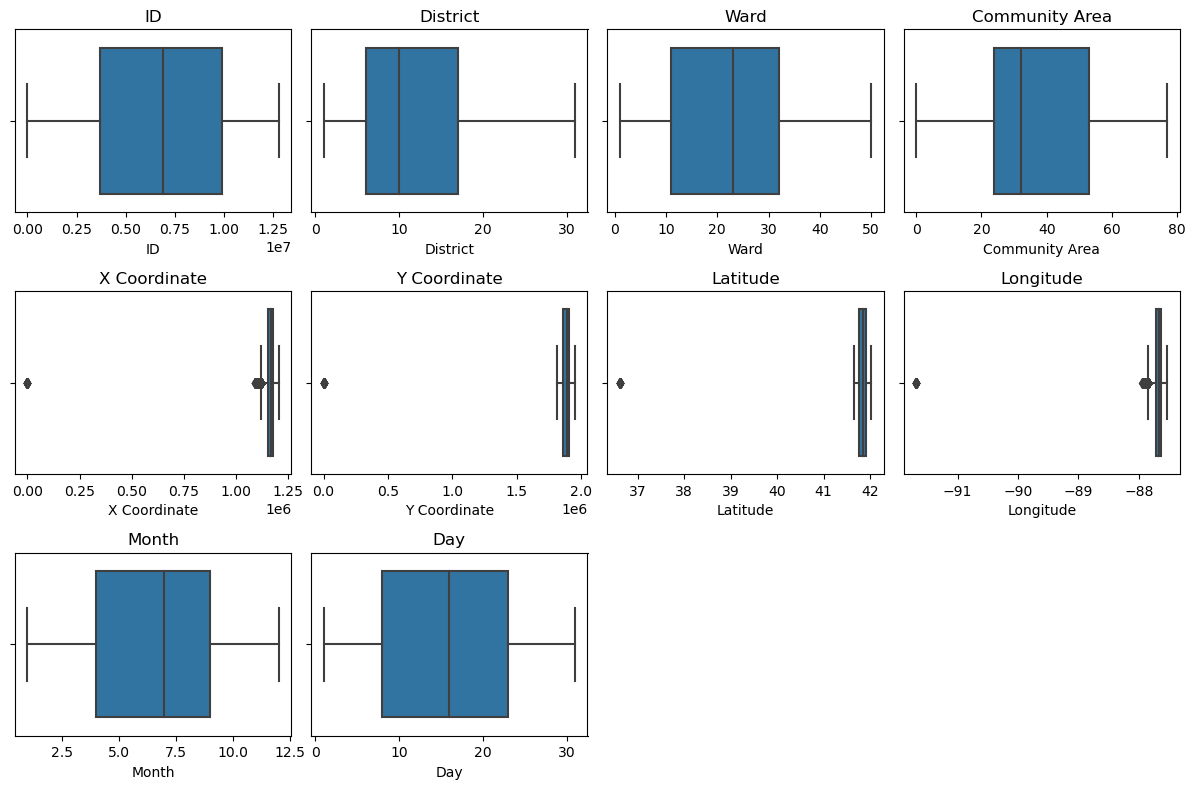

In [22]:
# List of Numeric Columns
numeric_columns = ['ID', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate',
                   'Latitude', 'Longitude', 'Month', 'Day']

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df7[col])
    plt.title(col)
plt.tight_layout()
plt.show()

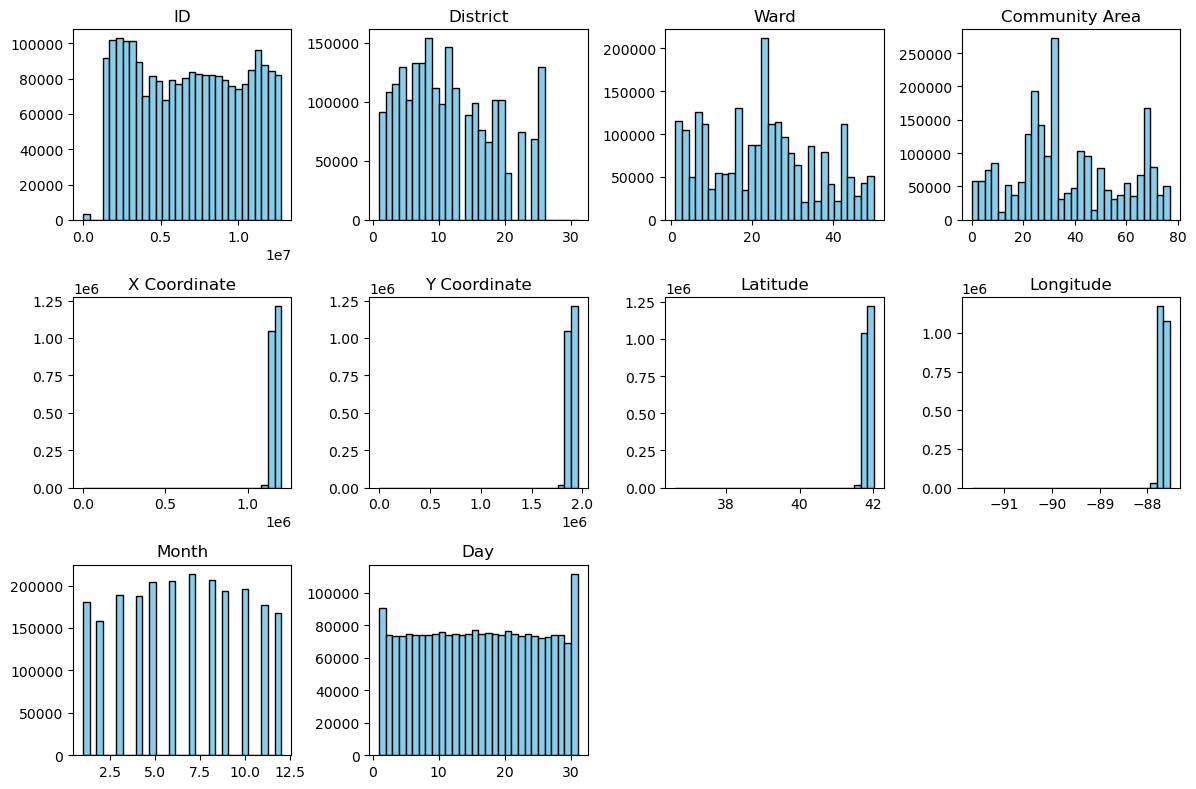

In [23]:
# Create histograms for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    plt.hist(df7[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


In [24]:
# Define a function to remove outliers from a numeric column
def remove_outliers(column):
    # Calculate quartiles (Q1 and Q3)
    Q1 = df7[column].quantile(0.25)
    Q3 = df7[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    filtered_df7 = df7[(df7[column] >= lower_bound) & (df7[column] <= upper_bound)]
    
    return filtered_df7

# Remove outliers from each numeric column
for col in numeric_columns:
    df7 = remove_outliers(col)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(df7.head())


DataFrame after removing outliers:
         ID Case Number                Date                 Block  IUCR  \
0   6407111    HP485721 2008-07-26 14:30:00  085XX S MUSKEGON AVE  1320   
1  11398199    JB372830 2018-07-31 10:57:00     092XX S ELLIS AVE  143C   
2   5488785    HN308568 2007-04-27 10:30:00     062XX N TRIPP AVE  0610   
3  11389116    JB361368 2018-07-23 08:55:00    0000X N KEELER AVE  0560   
4  12420431    JE297624 2021-07-11 06:40:00   016XX W HARRISON ST  051A   

        Primary Type               Description  \
0    CRIMINAL DAMAGE                TO VEHICLE   
1  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2           BURGLARY            FORCIBLE ENTRY   
3            ASSAULT                    SIMPLE   
4            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  Domestic  ...  FBI Code  \
0                                  STREET   False     False  ...        14   
1                               POOL ROOM    True     Fal

In [25]:
# Generate summary statistics for numeric columns
summary_stats = df7.describe()

# Print the summary statistics
print(summary_stats)


                 ID          Beat      District          Ward  Community Area  \
count  2.267029e+06  2.267029e+06  2.267029e+06  2.267029e+06    2.267029e+06   
mean   6.880183e+06  1.184095e+03  1.126628e+01  2.266390e+01    3.688014e+01   
std    3.418988e+06  7.037258e+02  6.955979e+00  1.323736e+01    2.056653e+01   
min    6.370000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    3.713808e+06  6.210000e+02  6.000000e+00  1.100000e+01    2.400000e+01   
50%    6.883038e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01   
75%    9.884664e+06  1.731000e+03  1.700000e+01  3.200000e+01    5.300000e+01   
max    1.278199e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       X Coordinate  Y Coordinate          Year      Latitude     Longitude  \
count  2.267029e+06  2.267029e+06  2.267029e+06  2.267029e+06  2.267029e+06   
mean   1.164904e+06  1.885573e+06  2.009634e+03  4.184161e+01 -8.767039e+01   
std    1.560461e+04  3.112706e+04

In [26]:
# Calculate skewness for all numerical variables
skewness = df7.skew()

In [27]:
skewness

ID                0.038815
Arrest            1.065407
Domestic          2.099671
Beat              0.397667
District          0.445571
Ward              0.183031
Community Area    0.250080
X Coordinate     -0.085574
Y Coordinate     -0.051558
Year              0.347389
Latitude         -0.052942
Longitude        -0.095286
Month            -0.023773
Day               0.012562
dtype: float64

In [28]:
# Calculate kurtosis for all numerical variables
kurtosis = df7.kurt()

In [29]:
kurtosis

ID               -1.260579
Arrest           -0.864910
Domestic          2.408622
Beat             -0.954579
District         -0.856525
Ward             -0.872150
Community Area   -0.930703
X Coordinate     -0.435843
Y Coordinate     -0.936402
Year             -1.014017
Latitude         -0.939320
Longitude        -0.435309
Month            -1.130781
Day              -1.189846
dtype: float64

In [79]:
# Calculate range for all numerical variables
# Select only numerical columns for analysis
numerical_columns = df7.select_dtypes(include=['number'])

# Calculate range for all numerical columns
variable_range = numerical_columns.max() - numerical_columns.min()


In [35]:
# Frequency distribution for Block
print("\nFrequency distribution for Block:\n")
print(df7['Block'].value_counts().head(10).to_string())


Frequency distribution for Block:

001XX N STATE ST                       4362
076XX S CICERO AVE                     3010
008XX N MICHIGAN AVE                   2800
0000X N STATE ST                       2587
064XX S DR MARTIN LUTHER KING JR DR    1692
063XX S DR MARTIN LUTHER KING JR DR    1649
023XX S STATE ST                       1542
001XX W 87TH ST                        1346
008XX N STATE ST                       1320
012XX S WABASH AVE                     1301


In [36]:
# Frequency distribution for Case Number
print("\nFrequency distribution for Case Number:\n")
print(df7['Case Number'].value_counts().head(10).to_string())


Frequency distribution for Case Number:

HK172551    3
HJ104730    3
HR300068    2
JA185074    2
HM154020    2
JB483810    2
HZ497841    2
JF152198    2
HV295764    2
HJ756295    2


In [37]:
# Frequency distribution for IUCR
print("\nFrequency distribution for IUCR:\n")
print(df7['IUCR'].value_counts())


Frequency distribution for IUCR:

0820    183742
0486    178082
0460    165500
1320    121378
1310    120183
         ...  
1521         1
1624         1
5094         1
1625         1
0141         1
Name: IUCR, Length: 392, dtype: int64


In [38]:
# Frequency distribution for Description
print("\nFrequency distribution for Description:\n")
print(df7['Description'].value_counts())


Frequency distribution for Description:

SIMPLE                                                       267278
$500 AND UNDER                                               183739
DOMESTIC BATTERY SIMPLE                                      178082
TO VEHICLE                                                   125740
TO PROPERTY                                                  120183
                                                              ...  
UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL                     1
AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT         1
KEEP PLACE OF JUV PROSTITUTION                                    1
FOUND PASSPORT                                                    1
SELL / ADVERTISE FIREWORKS                                        1
Name: Description, Length: 515, dtype: int64


In [39]:
# Frequency distribution for Location Description
print("\nFrequency distribution for Location Description:\n")
print(df7['Location Description'].value_counts())


Frequency distribution for Location Description:

STREET                                          590358
RESIDENCE                                       383704
APARTMENT                                       252649
SIDEWALK                                        216210
OTHER                                            80916
                                                 ...  
VEHICLE-COMMERCIAL - TROLLEY BUS                     1
CHA STAIRWELL                                        1
SCHOOL YARD                                          1
VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS         1
SEWER                                                1
Name: Location Description, Length: 199, dtype: int64


In [40]:
# Frequency distribution for Location
print("\nFrequency distribution for Location:\n")
print(df7['Location'].value_counts())


Frequency distribution for Location:

(41.855781877, -87.665970622)    23985
(41.754592961, -87.741528537)     3045
(41.883500187, -87.627876698)     2415
(41.897895128, -87.624096605)     1453
(41.909664252, -87.742728815)     1049
                                 ...  
(41.897969, -87.72862529)            1
(41.961409252, -87.732140114)        1
(41.909736091, -87.737511365)        1
(41.688677465, -87.607123244)        1
(41.998018312, -87.808522175)        1
Name: Location, Length: 544345, dtype: int64


In [41]:
# Consistency Check: Check if 'Arrest' column contains only boolean values
print("Consistency Check: Arrest column")
print(df7['Arrest'].value_counts())  # Check unique values

# Validity Check: Check if 'Year' column contains valid years
print("\nValidity Check: Year column")
print(df7['Year'].min(), df7['Year'].max())  # Check min and max values

# Uniqueness Check: Check for duplicate entries in 'ID' column
print("\nUniqueness Check: ID column")
print(df7['ID'].duplicated().any())  # Check for duplicates

# Accuracy Check: Compare location coordinates against a map
# (This would require additional data or external validation)

# Format Check: Ensure 'Date' column is in datetime format
print("\nFormat Check: Date column")
print(df7['Date'].dtype)  # Check data type

# Range Check: Verify latitude and longitude ranges
print("\nRange Check: Latitude and Longitude columns")
print(df7['Latitude'].min(), df7['Latitude'].max())  # Check min and max values
print(df7['Longitude'].min(), df7['Longitude'].max())  # Check min and max values


Consistency Check: Arrest column
False    1666442
True      600587
Name: Arrest, dtype: int64

Validity Check: Year column
2001 2022

Uniqueness Check: ID column
False

Format Check: Date column
datetime64[ns]

Range Check: Latitude and Longitude columns
41.644585429 42.022910333
-87.838760845 -87.524529378


In [78]:
# 1. Check for unique values and potential anomalies in the prioritized columns
priority_columns = ['Case Number', 'District', 'Ward', 'Community Area', 
                    'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']


print("\nUnique values and potential anomalies:")
for column in priority_columns:
    unique_values = df7[column].unique()
    print(f"{column}: {unique_values[:10]}")

# 2. Validate consistency of geographic data
print("\nConsistency of geographic data:")
print("Latitude and Longitude consistency:")
print(df7[(df7['Latitude'] >= 41) & (df7['Latitude'] <= 42) & (df7['Longitude'] >= -88) & (df7['Longitude'] <= -87)].shape[0], "records within the expected range.")


# 3. Validate consistency of categorical data
print("\nConsistency of categorical data:")
print("Unique values count for Case Number, District, Ward, Community Area:")
for column in ['Case Number', 'District', 'Ward', 'Community Area']:
    unique_values_count = df7[column].nunique()
    print(f"{column}: {unique_values_count} unique values.")



Unique values and potential anomalies:
Case Number: ['HP485721' 'JB372830' 'HN308568' 'JB361368' 'JE297624' 'G498287'
 'HM660983' 'HX527438' 'HS386492' 'HZ313634']
District: [ 4. 17. 11. 12.  2. 15. 25. 14.  8.  6.]
Ward: [10.  8. 39. 28. 27. 23. 29. 37. 26. 35.]
Community Area: [46. 47. 12. 26. 28. 32. 25. 23. 22. 27.]
X Coordinate: [1196638. 1184499. 1146911. 1148388. 1165430. 1174343. 1139154. 1147306.
 1154458. 1157345.]
Y Coordinate: [1848800. 1843935. 1941022. 1899882. 1897441. 1885951. 1896536. 1908305.
 1910116. 1914452.]
Latitude: [41.73997962 41.72692215 41.99413762 41.88121748 41.87417369 41.84245008
 41.87220858 41.9043519  41.9091814  41.92102149]
Longitude: [-87.55512004 -87.599747   -87.73495905 -87.73058996 -87.66808212
 -87.63570069 -87.76457858 -87.73434713 -87.70802724 -87.69730355]

Consistency of geographic data:
Latitude and Longitude consistency:
2221191 records within the expected range.

Consistency of categorical data:
Unique values count for Case Number, Dis

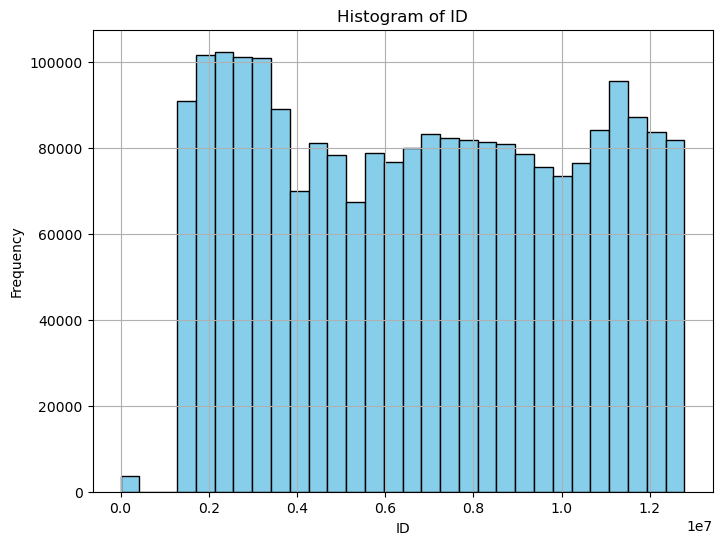

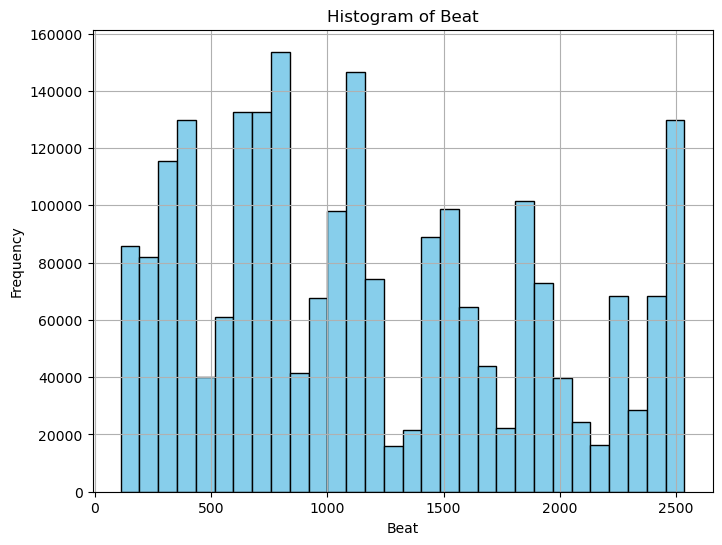

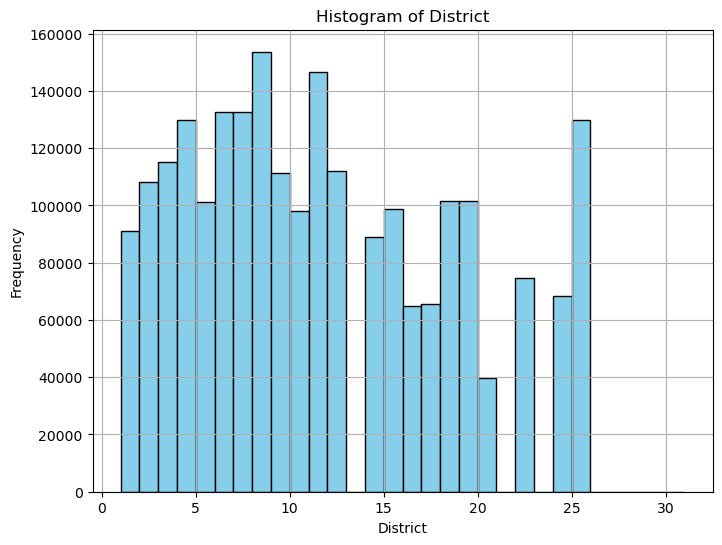

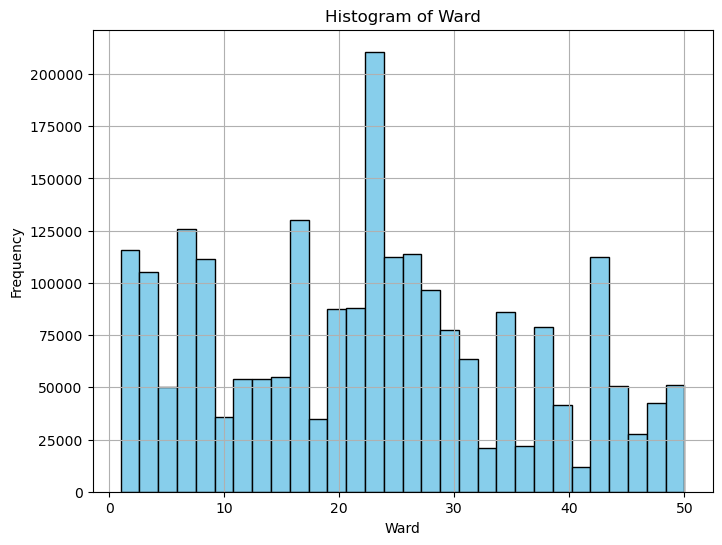

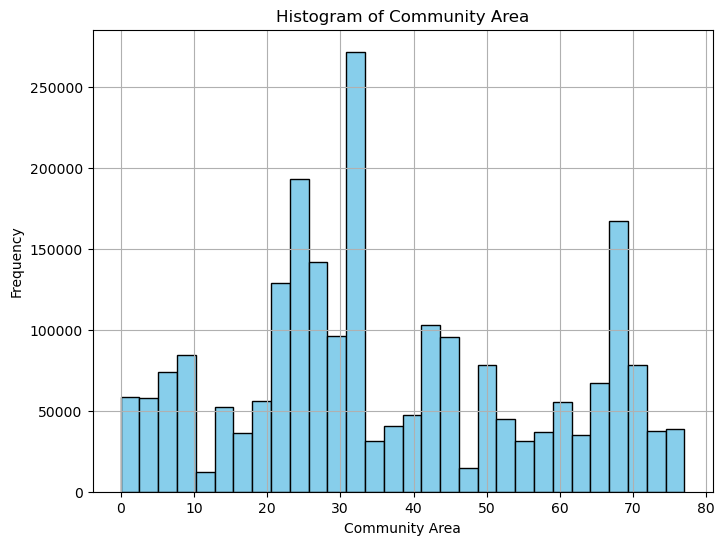

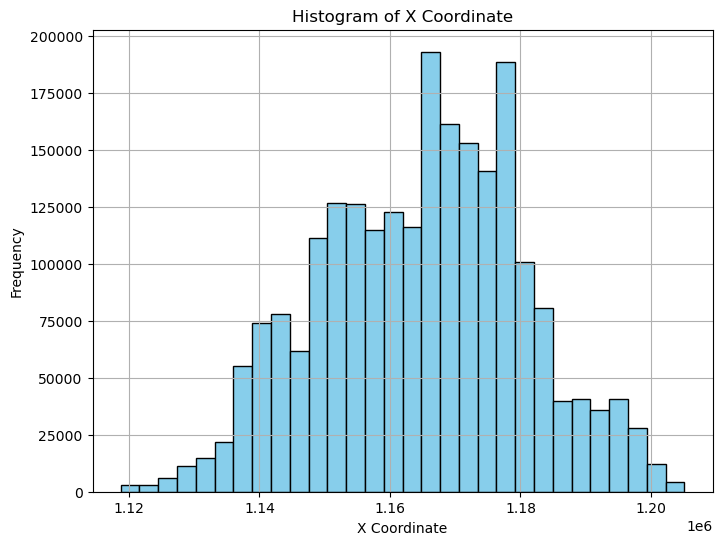

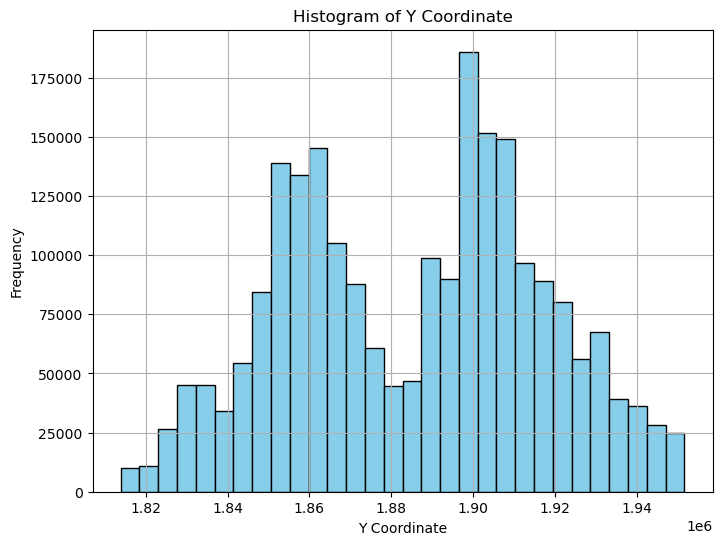

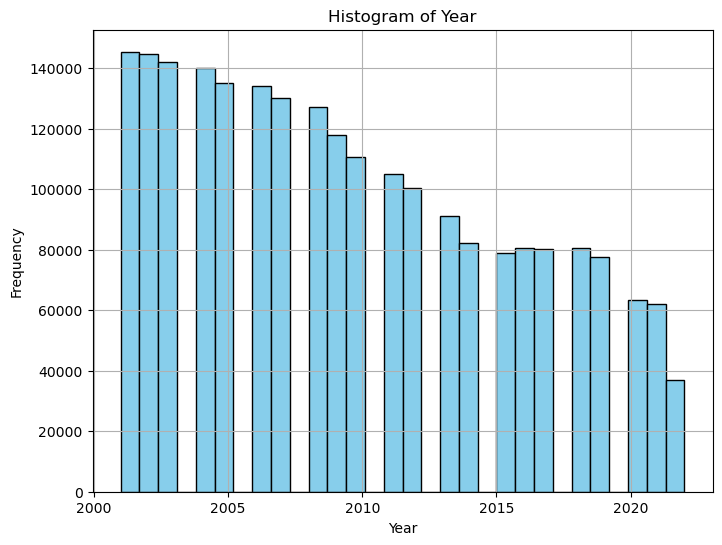

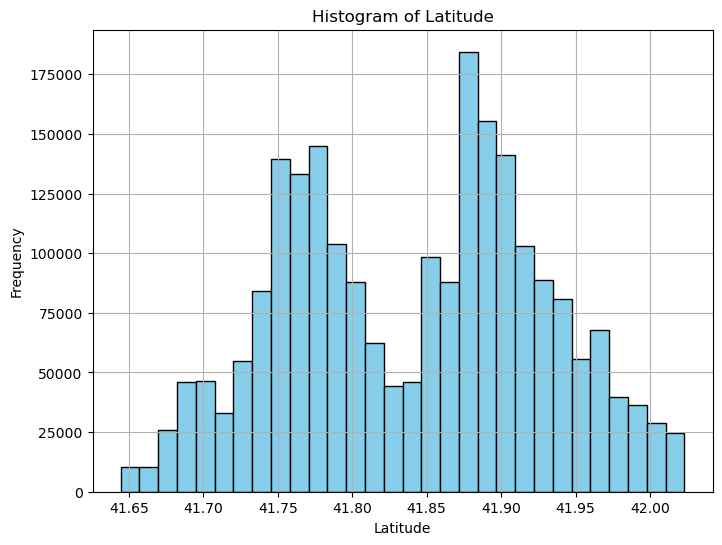

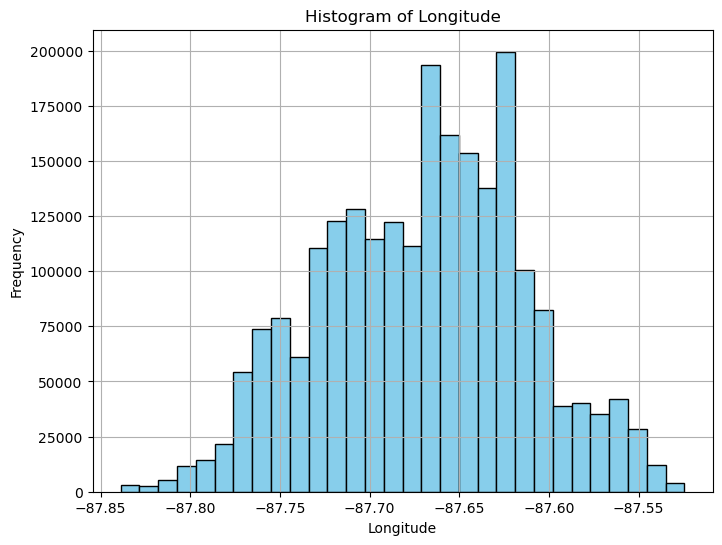

In [43]:


# List of numeric columns
numeric_columns_1= ['ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']

# Plot histograms for numeric variables
for column in numeric_columns_1:
    plt.figure(figsize=(8, 6))
    plt.hist(df7[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


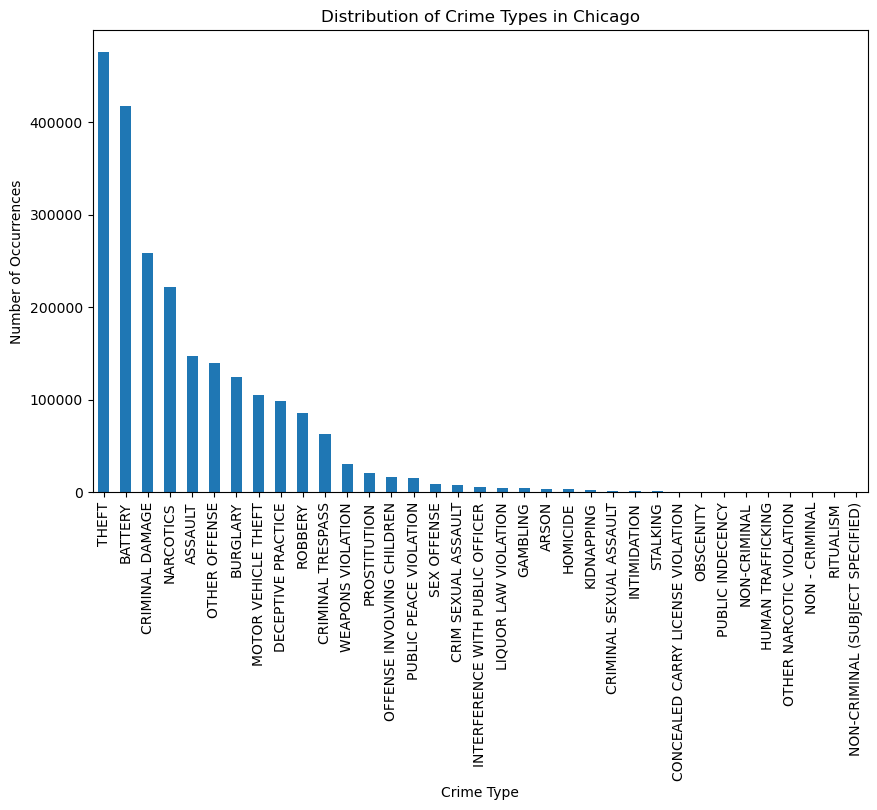

In [44]:


# visualization of the distribution of crime types,
# Extract the primary type of each crime
crime_types = df7['Primary Type'].value_counts()

# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
crime_types.plot(kind='bar')
plt.title('Distribution of Crime Types in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()


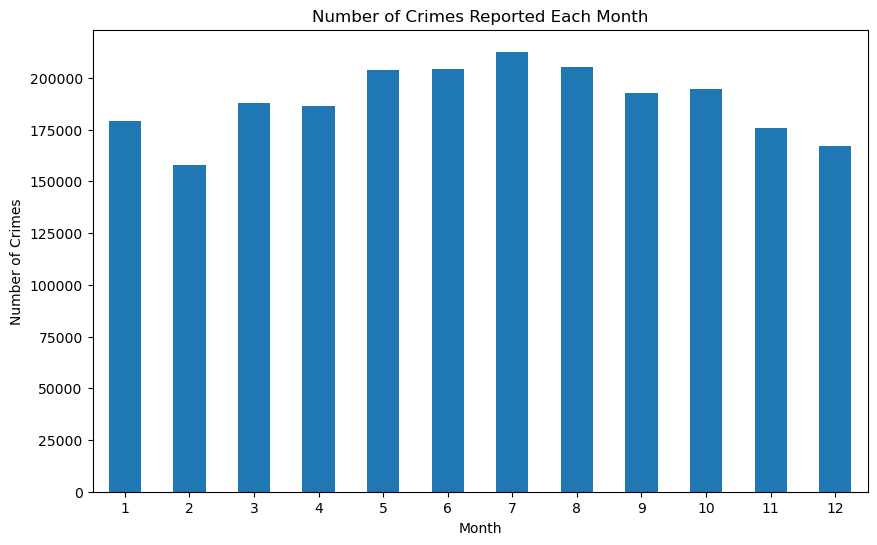

In [45]:
# Extract the month from the 'Date' column
df7['Month'] = df7['Date'].dt.month

# Count the occurrences of crimes for each month
crimes_by_month = df7['Month'].value_counts().sort_index()

# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
crimes_by_month.plot(kind='bar')
plt.title('Number of Crimes Reported Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()


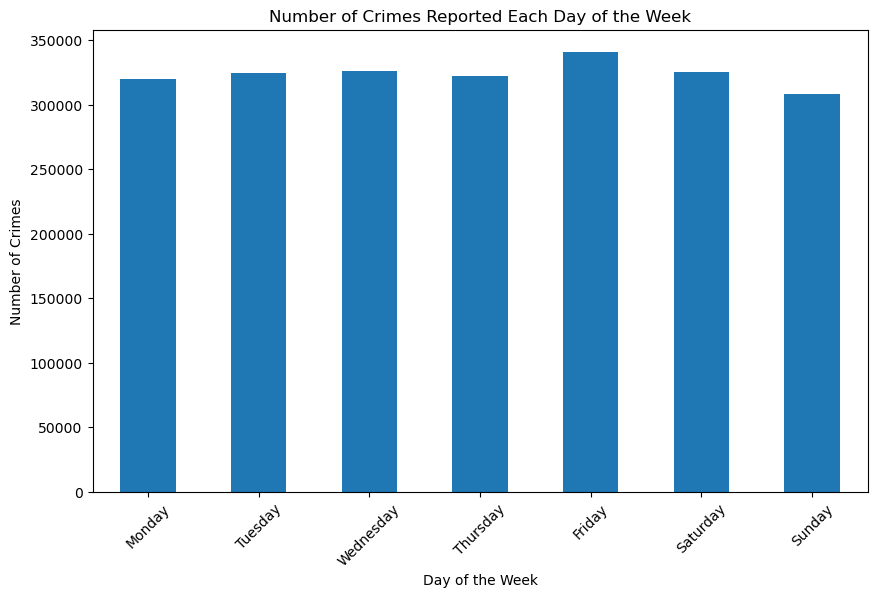

In [46]:
# Extract the day of the week from the 'Date' column (Monday=0, Sunday=6)
df7['Day_of_Week'] = df7['Date'].dt.dayofweek

# Define a dictionary to map day of week integers to their respective names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the day of week integers to their names
df7['Day_of_Week'] = df7['Day_of_Week'].map(day_names)

# Count the occurrences of crimes for each day of the week
crimes_by_day = df7['Day_of_Week'].value_counts()

# Sort the days of the week in the correct order
crimes_by_day = crimes_by_day.reindex(day_names.values())

# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
crimes_by_day.plot(kind='bar')
plt.title('Number of Crimes Reported Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


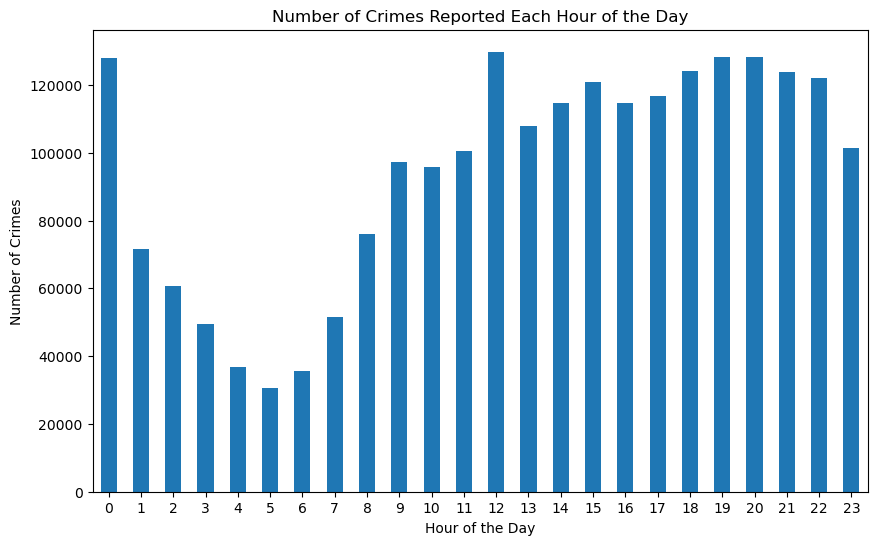

In [47]:
 # Extract the hour from the 'Date' column
df7['Hour'] = df7['Date'].dt.hour

# Count the occurrences of crimes for each hour of the day
crimes_by_hour = df7['Hour'].value_counts().sort_index()

# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
crimes_by_hour.plot(kind='bar')
plt.title('Number of Crimes Reported Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()


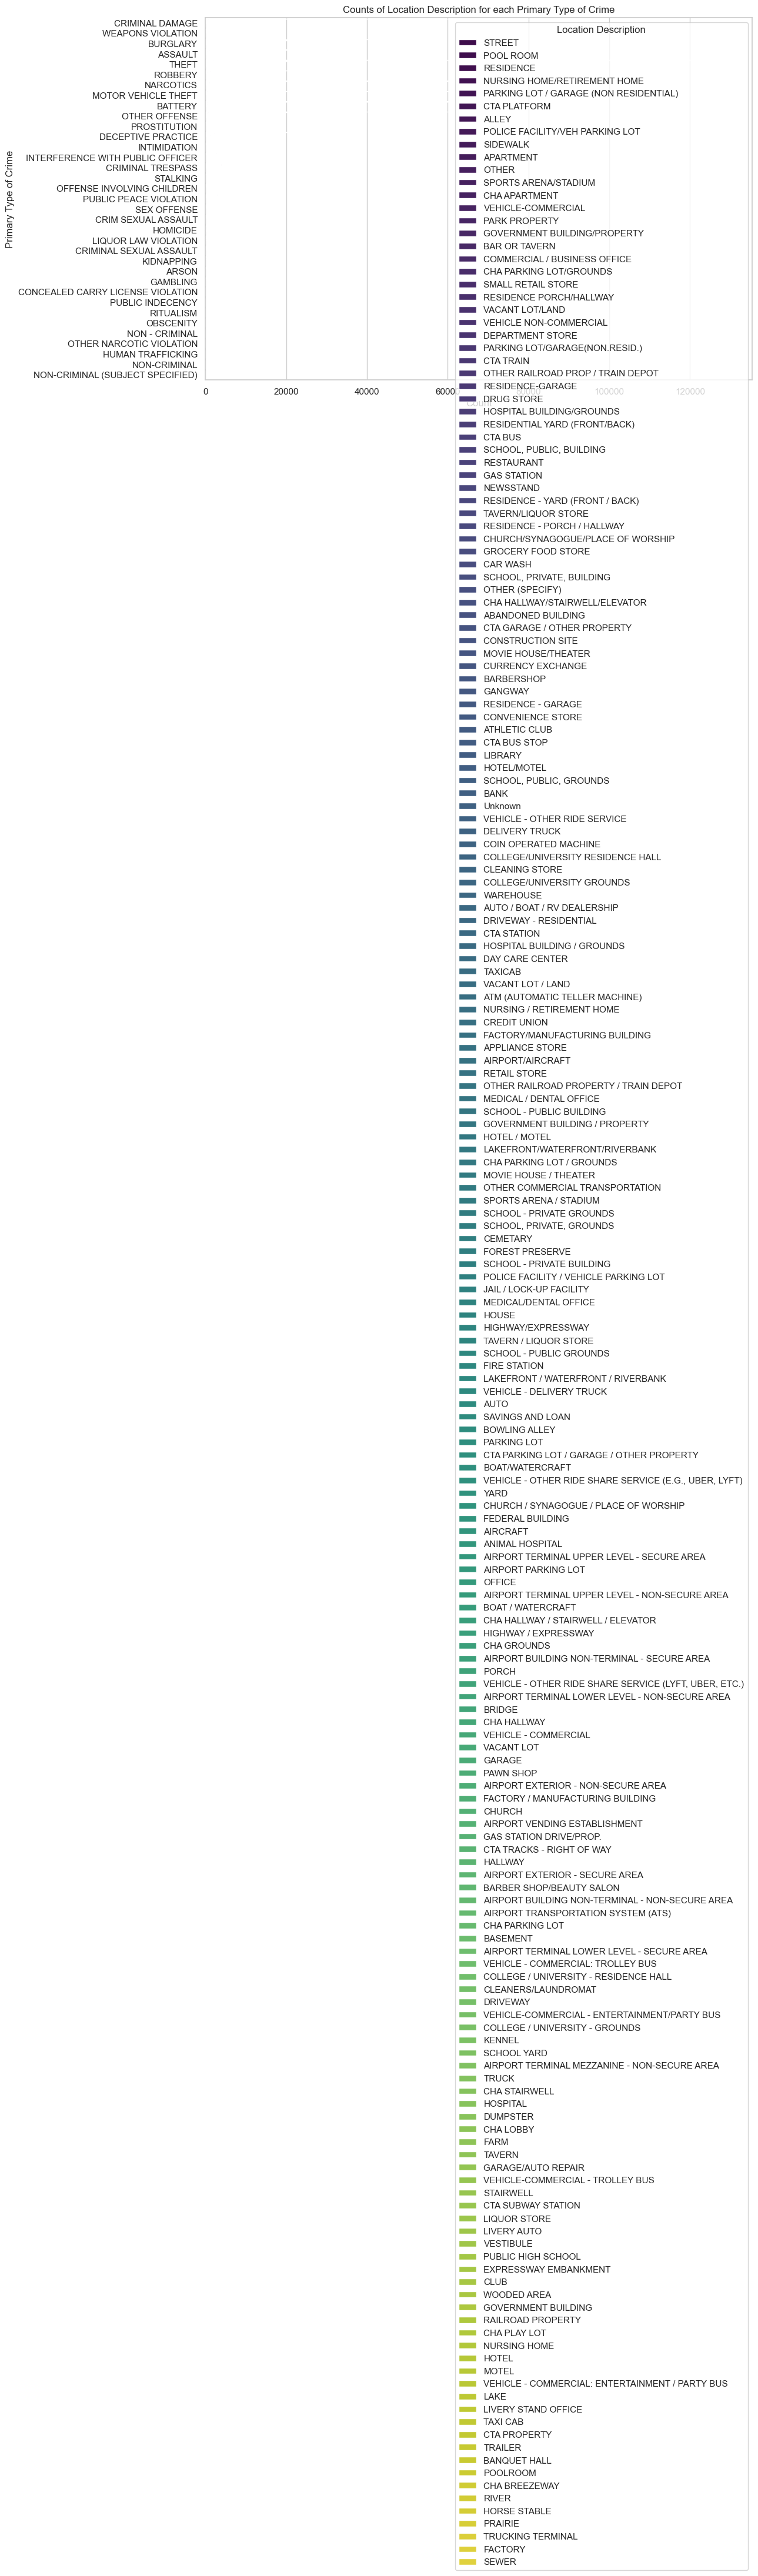

In [48]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(12, 8))
sns.countplot(y='Primary Type', hue='Location Description', data=df7, palette='viridis', dodge=True)
plt.title('Counts of Location Description for each Primary Type of Crime')
plt.xlabel('Count')
plt.ylabel('Primary Type of Crime')
plt.legend(title='Location Description', loc='upper right')
plt.show()


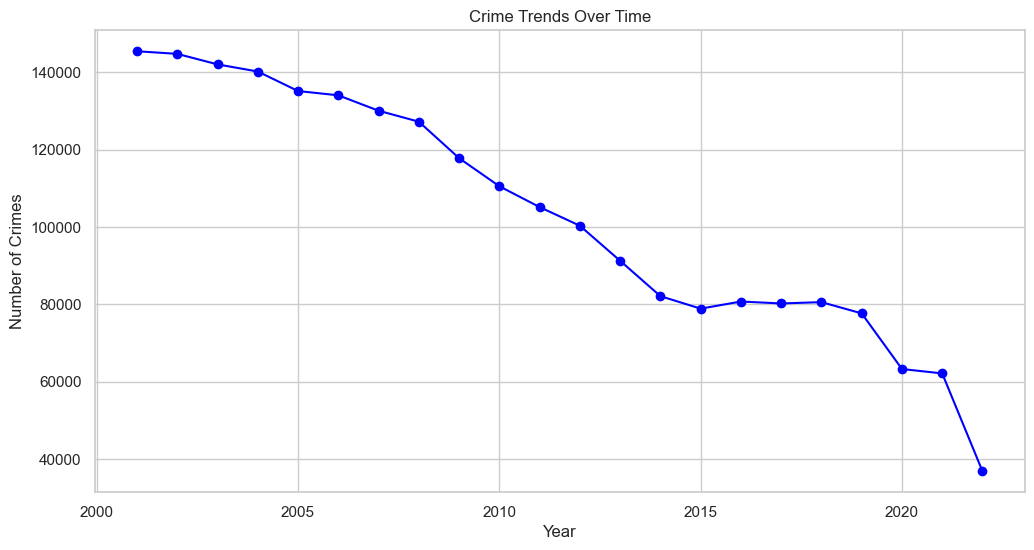

In [49]:

# Group the data by year and count the number of crimes each year
crime_trends = df7.groupby('Year').size()

# Plot the crime trends
plt.figure(figsize=(12, 6))
crime_trends.plot(kind='line', marker='o', color='blue')
plt.title('Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


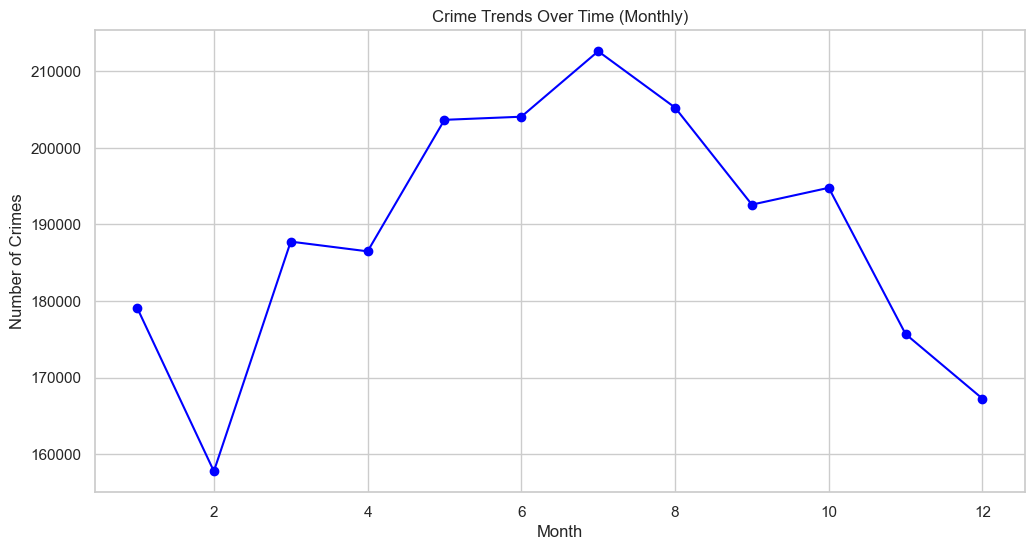

In [50]:
# Group the data by month and count the number of crimes each month
crime_trends_monthly = df7.groupby('Month').size()

# Plot the crime trends by month
plt.figure(figsize=(12, 6))
crime_trends_monthly.plot(kind='line', marker='o', color='blue')
plt.title('Crime Trends Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

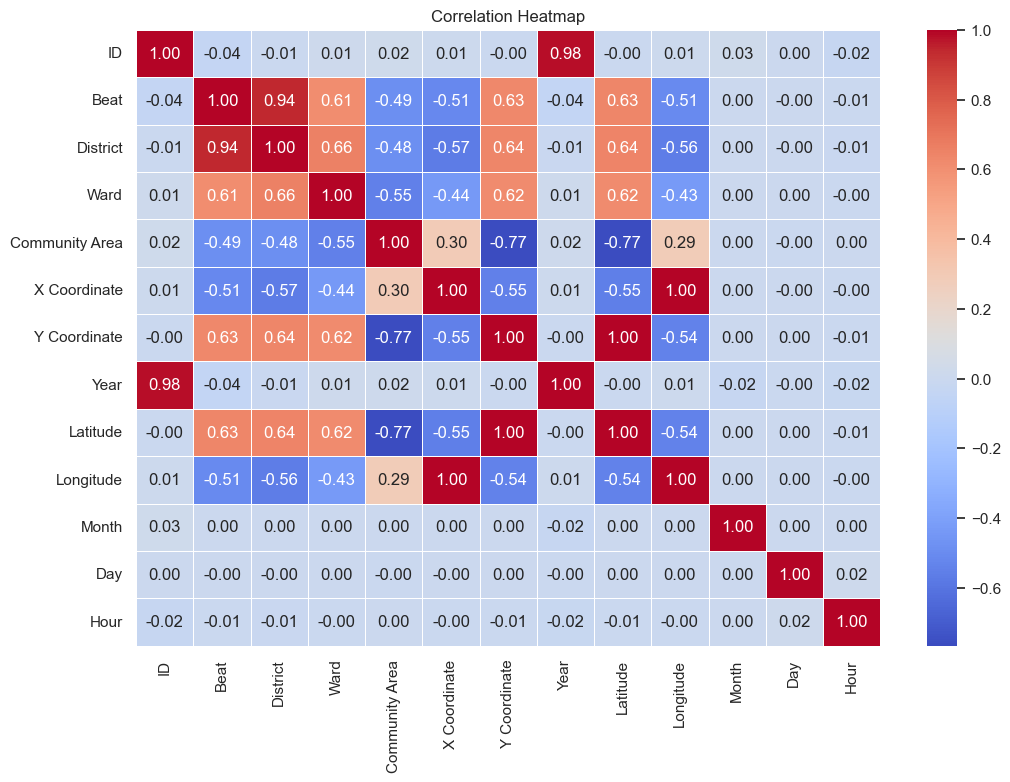

In [52]:

# correlation analysis
numeric_vars = df7.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_vars.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


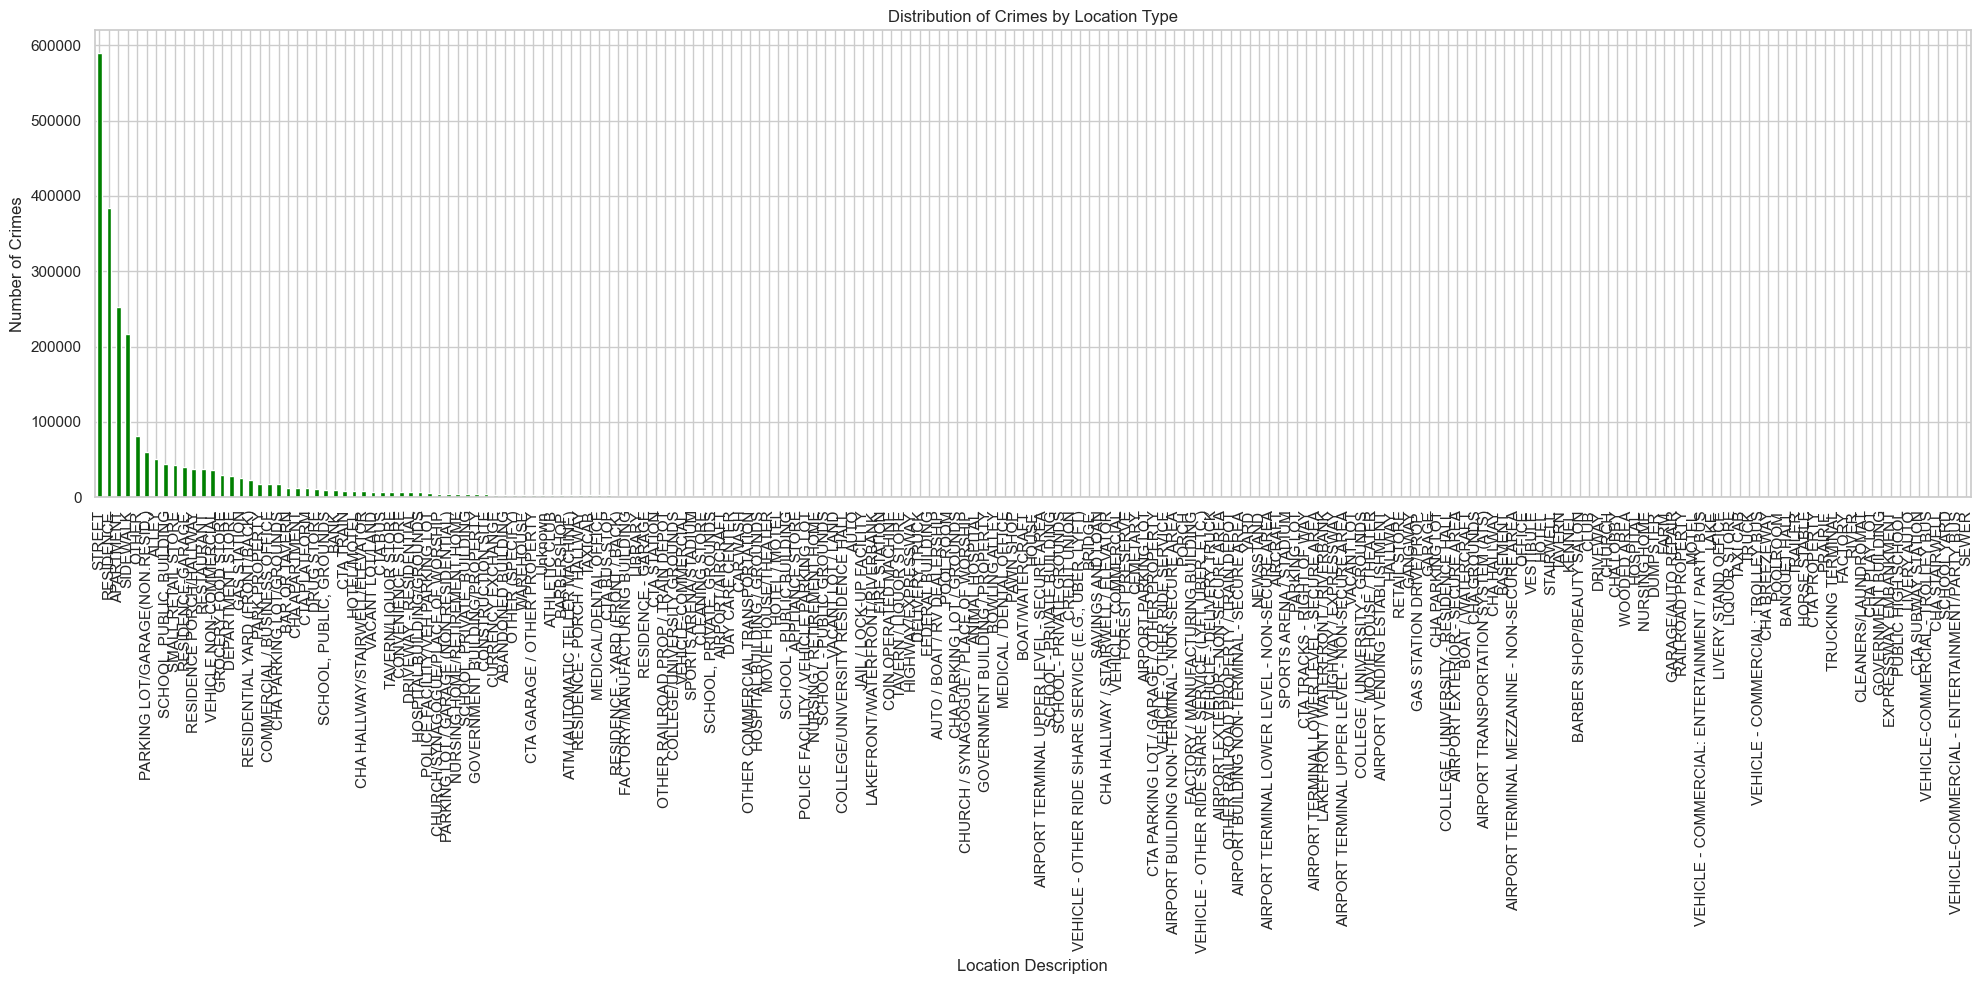

In [57]:

# Group the data by Location Description and count the number of crimes in each location
crime_by_location = df7['Location Description'].value_counts()

# Plot the distribution of crimes by location type with increased figure size
# Rotate x-axis labels 
plt.figure(figsize=(20, 10)) 
crime_by_location.plot(kind='bar', color='green')
plt.title('Distribution of Crimes by Location Type')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()



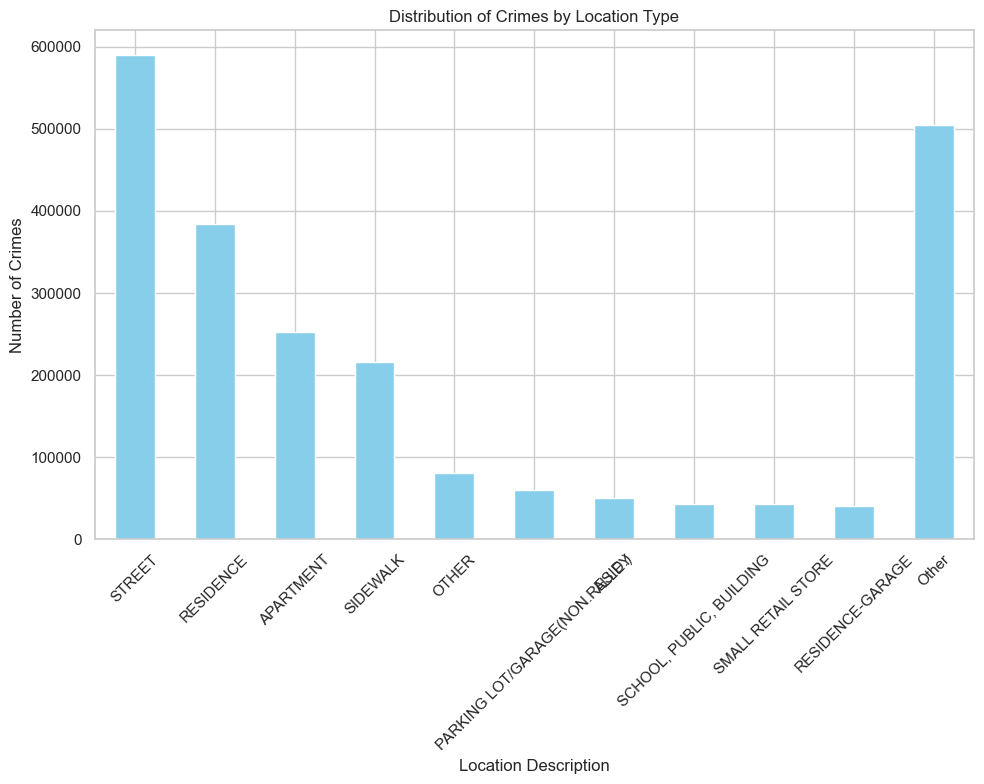

In [59]:
# Select top most frequent location descriptions
top_n = 10  # Change this value to adjust the number of top locations to display
top_locations = crime_by_location.head(top_n)

# Combine remaining locations into an "Other" category
other_locations_count = crime_by_location.iloc[top_n:].sum()
top_locations['Other'] = other_locations_count

# Plot the distribution of crimes by location type including an "Other" category
 # Rotate x-axis labels for better readability
plt.figure(figsize=(10, 8))  
top_locations.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crimes by Location Type')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


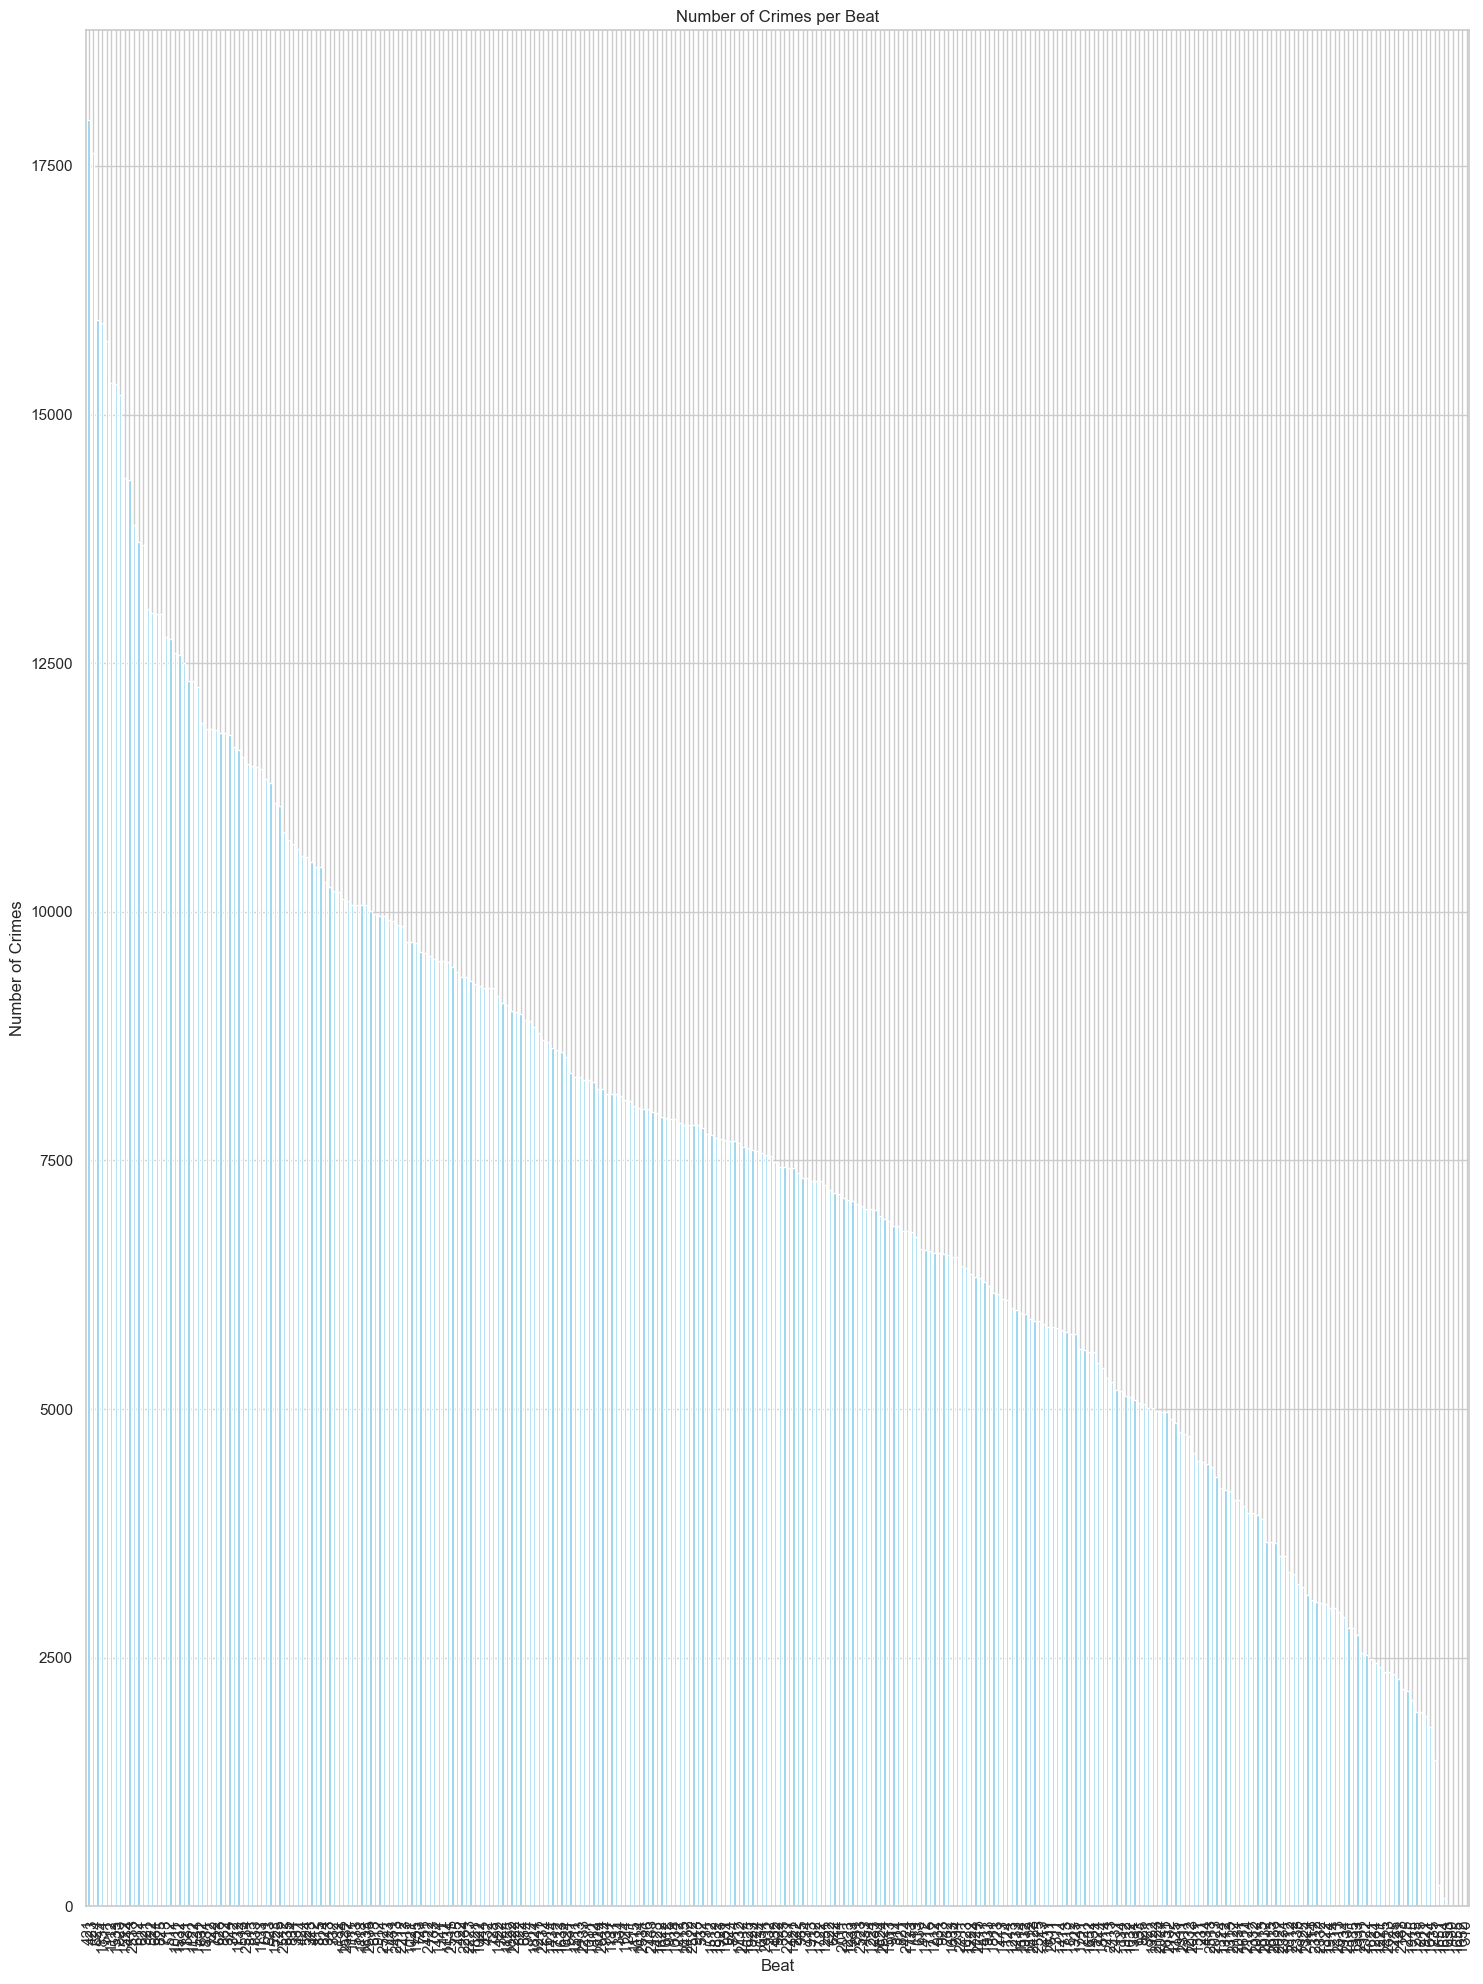

In [61]:
# Group the data by Beat and count the number of crimes in each beat
crime_by_beat = df7['Beat'].value_counts()

# Plot the distribution of crimes by beat
# Rotate x-axis labels
plt.figure(figsize=(15, 20))
crime_by_beat.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Beat')
plt.xlabel('Beat')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


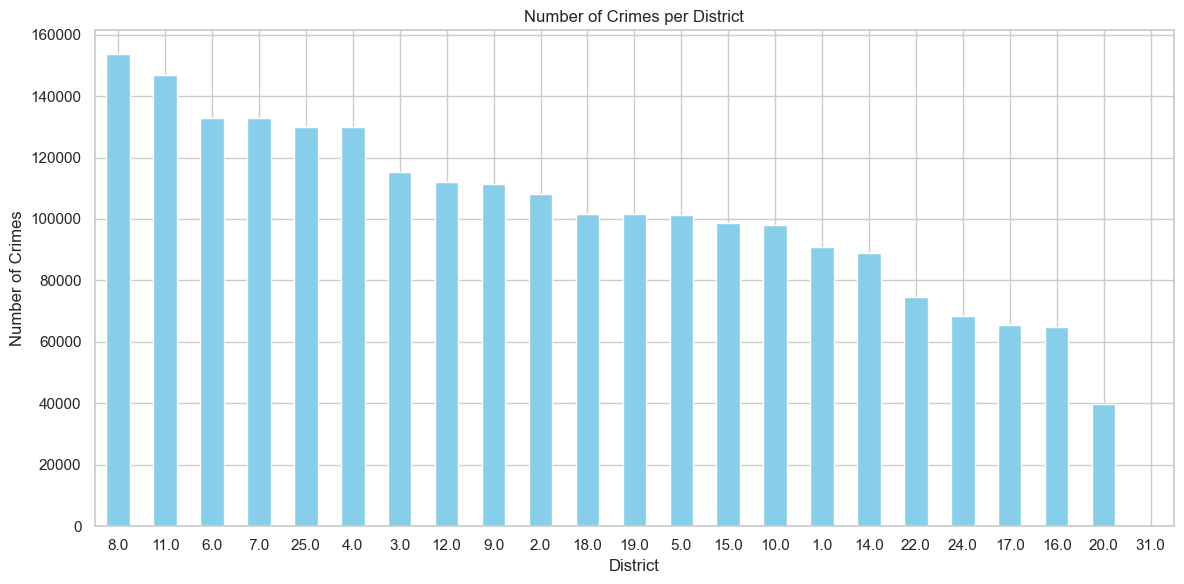

In [62]:
# Group the data by District and count the number of crimes in each district
crime_by_district = df7['District'].value_counts()

# Plot the distribution of crimes by district
 # Rotate x-axis labels 
plt.figure(figsize=(12, 6))
crime_by_district.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



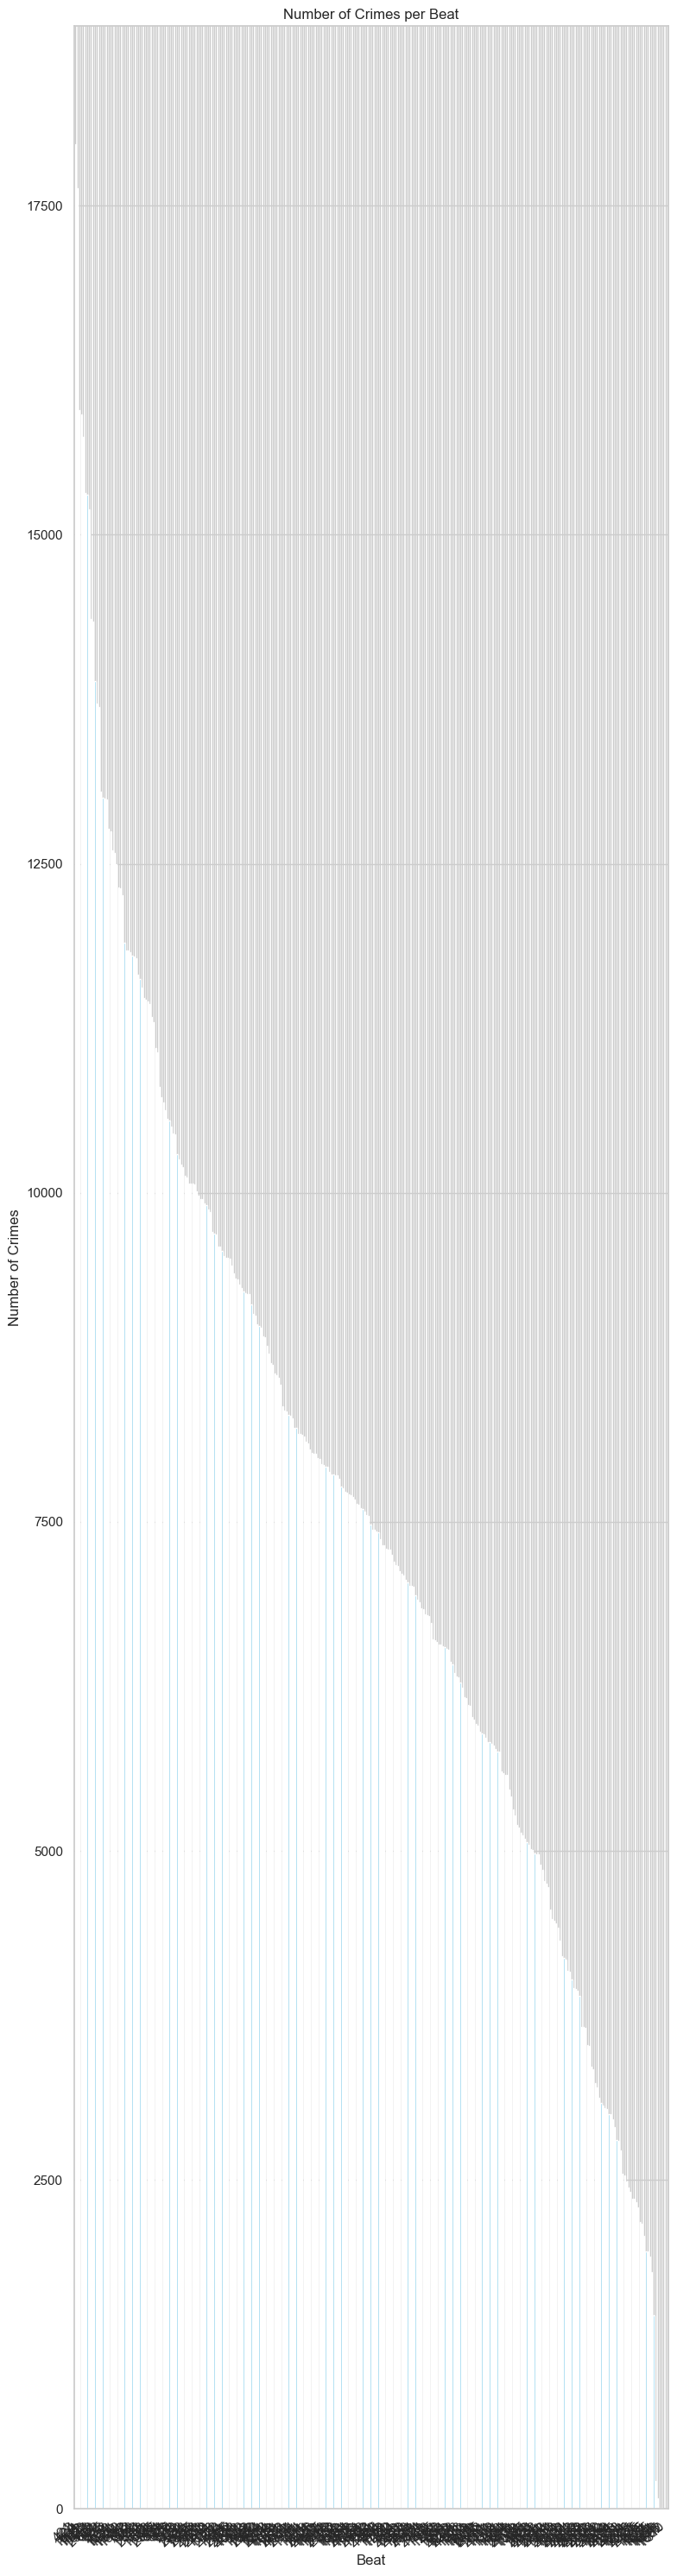

In [68]:
# Plot the distribution of crimes by beat with rotated x-axis labels
# Rotate x-axis labels and align to the right
plt.figure(figsize=(8, 30))
crime_by_beat.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Beat')
plt.xlabel('Beat')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


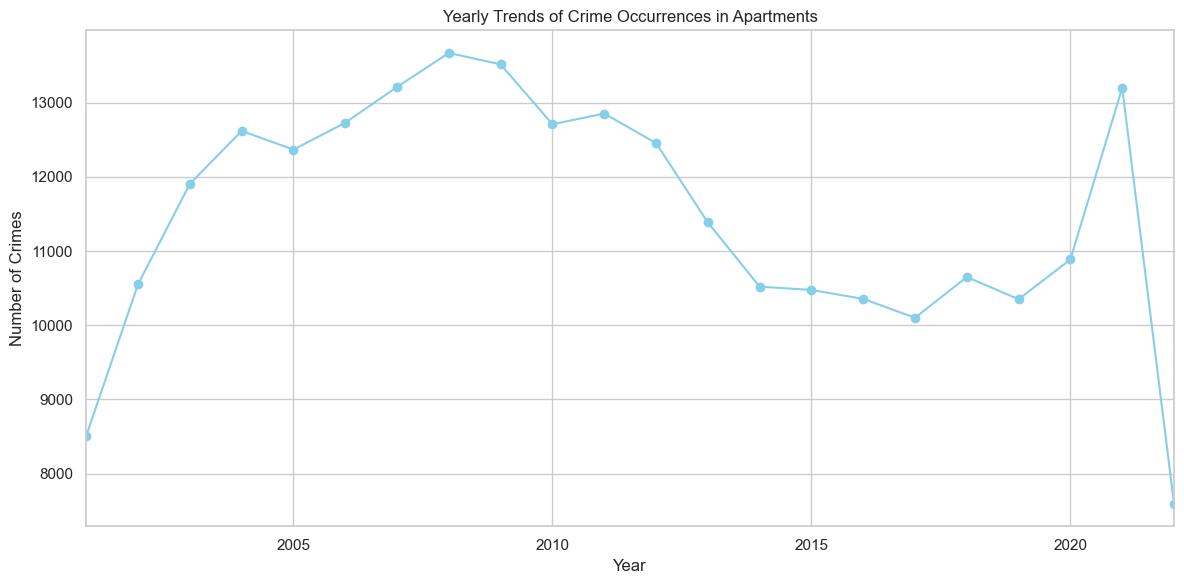

In [70]:
# Filter the data for crimes that occurred in apartments
apartment_crimes = df7[df7['Location Description'] == 'APARTMENT']

# Group the filtered data by year and count the number of crimes in each year
apartment_crimes_by_year = apartment_crimes.resample('Y', on='Date').size()

# Plot the yearly trends of crime occurrences in apartments
plt.figure(figsize=(12, 6))
apartment_crimes_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Trends of Crime Occurrences in Apartments')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()



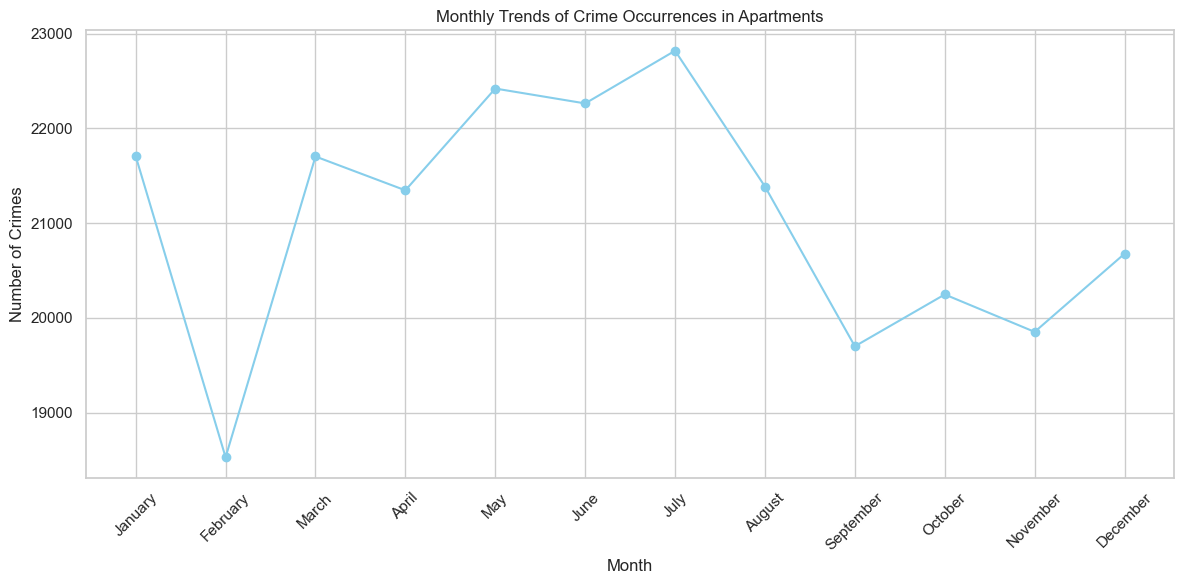

In [73]:

# Group the filtered data by month and count the number of crimes in each month
apartment_crimes_by_month = apartment_crimes.groupby('Month').size()

# Plot the monthly trends of crime occurrences in apartments
plt.figure(figsize=(12, 6))
apartment_crimes_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Trends of Crime Occurrences in Apartments')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Customize the x-axis labels using the existing Month column
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1, 13), months, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()





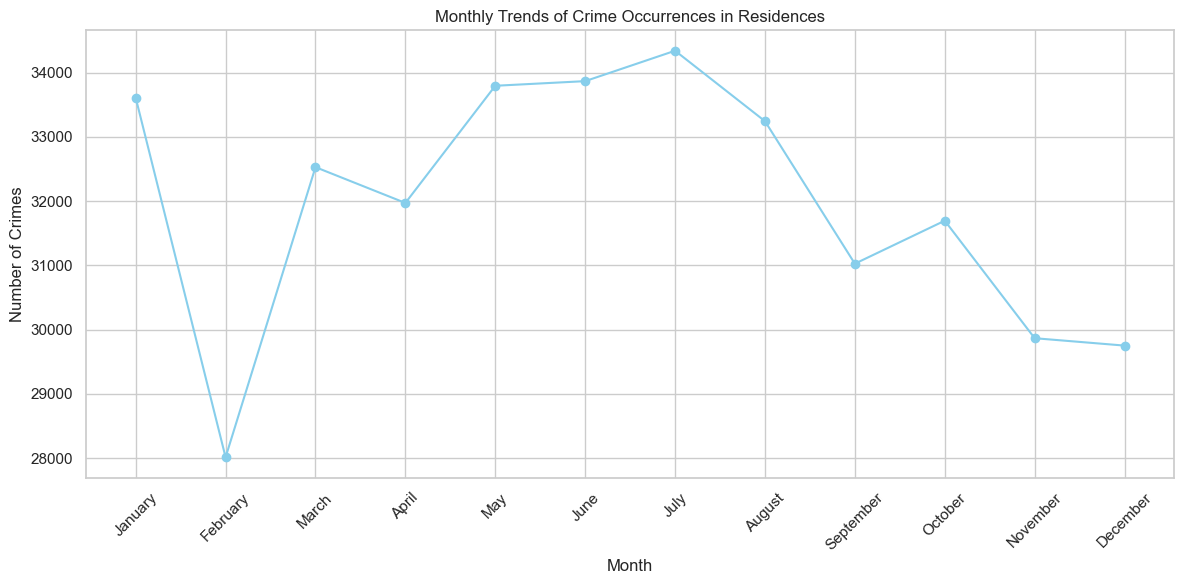

In [74]:
# Filter the data for crimes that occurred in residences
residence_crimes = df7[df7['Location Description'] == 'RESIDENCE']

# Group the filtered data by month and count the number of crimes in each month
residence_crimes_by_month = residence_crimes.groupby('Month').size()

# Plot the monthly trends of crime occurrences in residences
plt.figure(figsize=(12, 6))
residence_crimes_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Trends of Crime Occurrences in Residences')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Customize the x-axis labels using the existing Month column
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1, 13), months, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


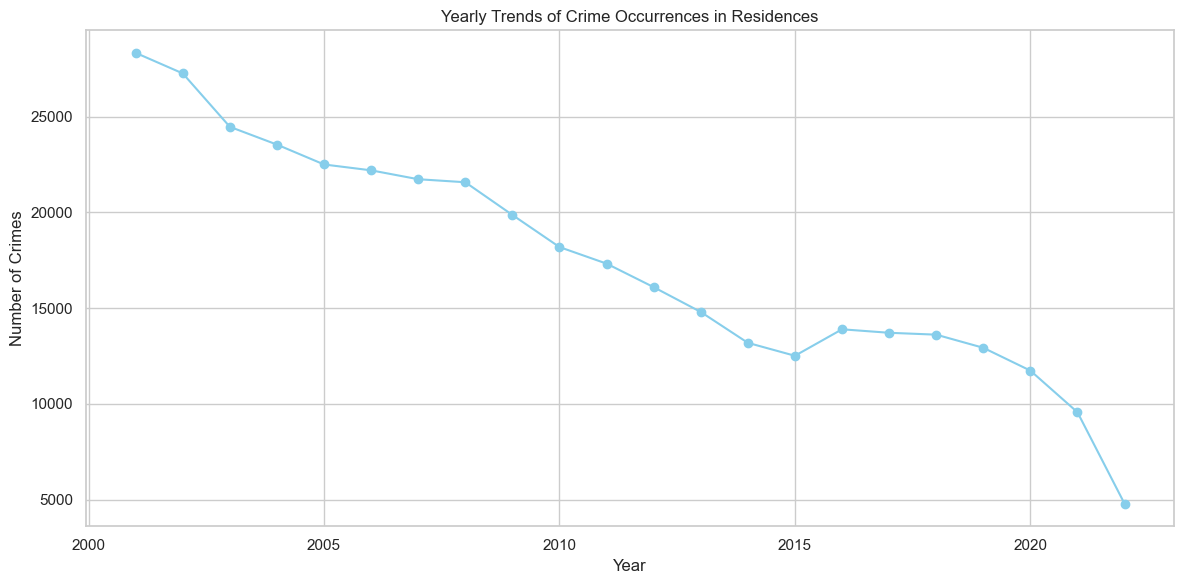

In [75]:
# Group the  data by year and count the number of crimes in each year
residence_crimes_by_year = residence_crimes.groupby('Year').size()

# Plot the yearly trends of crime occurrences in residences
plt.figure(figsize=(12, 6))
residence_crimes_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Trends of Crime Occurrences in Residences')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.grid(True)
plt.tight_layout()
plt.show()


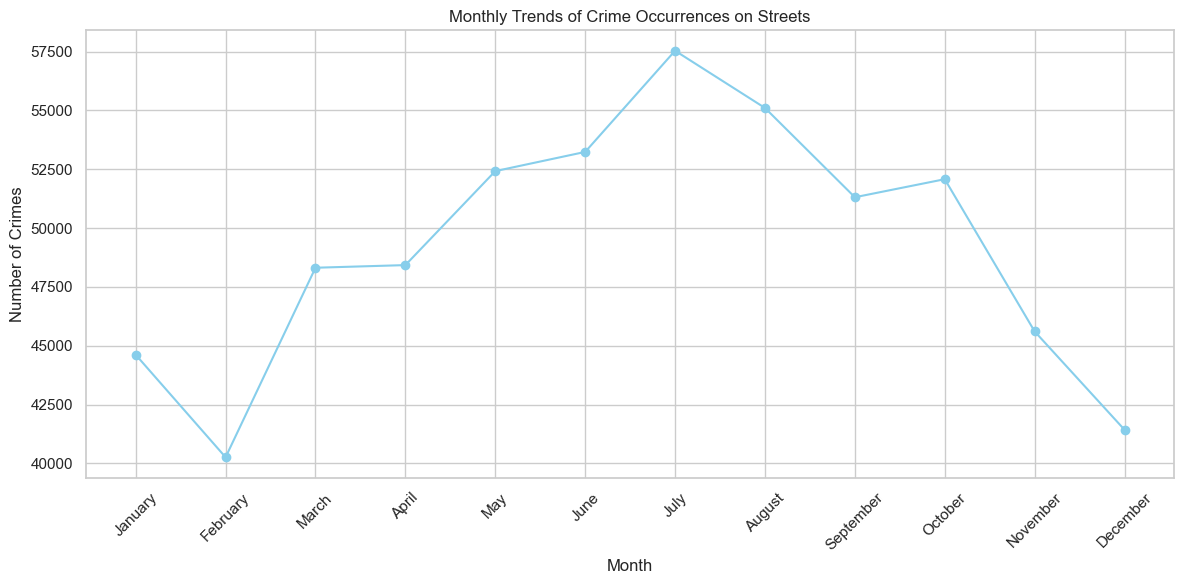

In [76]:
# Filter the data for crimes that occurred on streets
street_crimes = df7[df7['Location Description'] == 'STREET']

# Group the filtered data by month and count the number of crimes in each month
street_crimes_by_month = street_crimes.groupby('Month').size()

# Plot the monthly trends of crime occurrences on streets
plt.figure(figsize=(12, 6))
street_crimes_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Trends of Crime Occurrences on Streets')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Customize the x-axis labels using the existing Month column
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1, 13), months, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


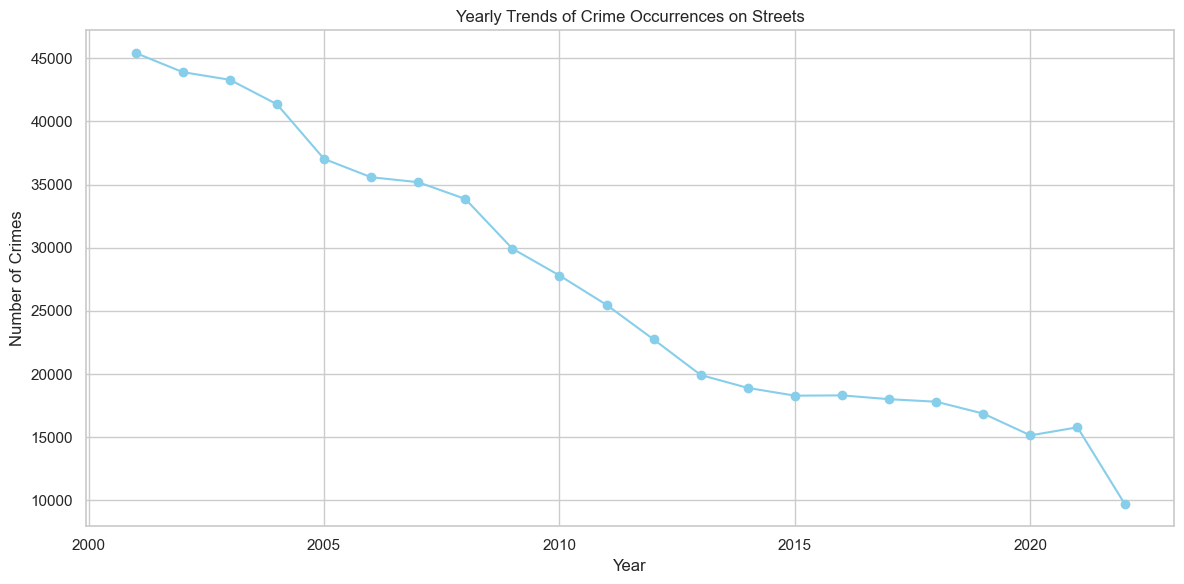

In [77]:
# Group the data by year and count the number of crimes in each year
street_crimes_by_year = street_crimes.groupby('Year').size()

# Plot the yearly trends of crime occurrences on streets
plt.figure(figsize=(12, 6))
street_crimes_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Trends of Crime Occurrences on Streets')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.grid(True)
plt.tight_layout()
plt.show()
